In [68]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
col_names = ['status','duration','credit_history','purpose','credit_amount','saving_account','employment',
                'install_rate','sex_status','other_debtors','residence','property','age','other_plans','housing',
                 'num_credits','job','liable_amount','telephone','foreign_worker', 'Good_Bad']
bank = pd.read_csv('data/german.data', sep=" ", header=None, names=col_names)


In [70]:
bank = pd.get_dummies(bank)
#Make a list of all of the columns in the df
cols = list(bank.columns.values) 
#Remove good_bad from list
cols.pop(cols.index('Good_Bad')) 
#Create new dataframe with columns in the order you want
bank = bank[cols+['Good_Bad']] 

bank.head()

,duration,credit_amount,install_rate,residence,age,num_credits,liable_amount,status_A11,status_A12,status_A13,...,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,Good_Bad
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,0,1,0,0,1,1,0,1
1,48,5951,2,2,22,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,2
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,1,0,0,1,0,1,0,1
3,42,7882,2,4,45,1,2,1,0,0,...,1,0,0,1,0,1,0,1,0,1
4,24,4870,3,4,53,2,2,1,0,0,...,1,0,0,1,0,1,0,1,0,2


In [71]:
feature_col = bank.loc[:, bank.columns != 'Good_Bad']
feature_col.head()

,duration,credit_amount,install_rate,residence,age,num_credits,liable_amount,status_A11,status_A12,status_A13,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,6,1169,4,4,67,2,1,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [72]:
#split dataset into features and target variable
X = bank.loc[:, bank.columns != 'Good_Bad']
y = bank.Good_Bad

In [73]:
#Split dataset into training and test sets
#70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [74]:
#create decision Tree classifer object
clf = DecisionTreeClassifier()
#Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict
y_pred = clf.predict(X_test)

In [75]:
#the Classification rate of 68.67 considered is a good accuracy. Lets see if we can improve it by tuning
# the parameters in the Decision Tree Algorithm.
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6766666666666666


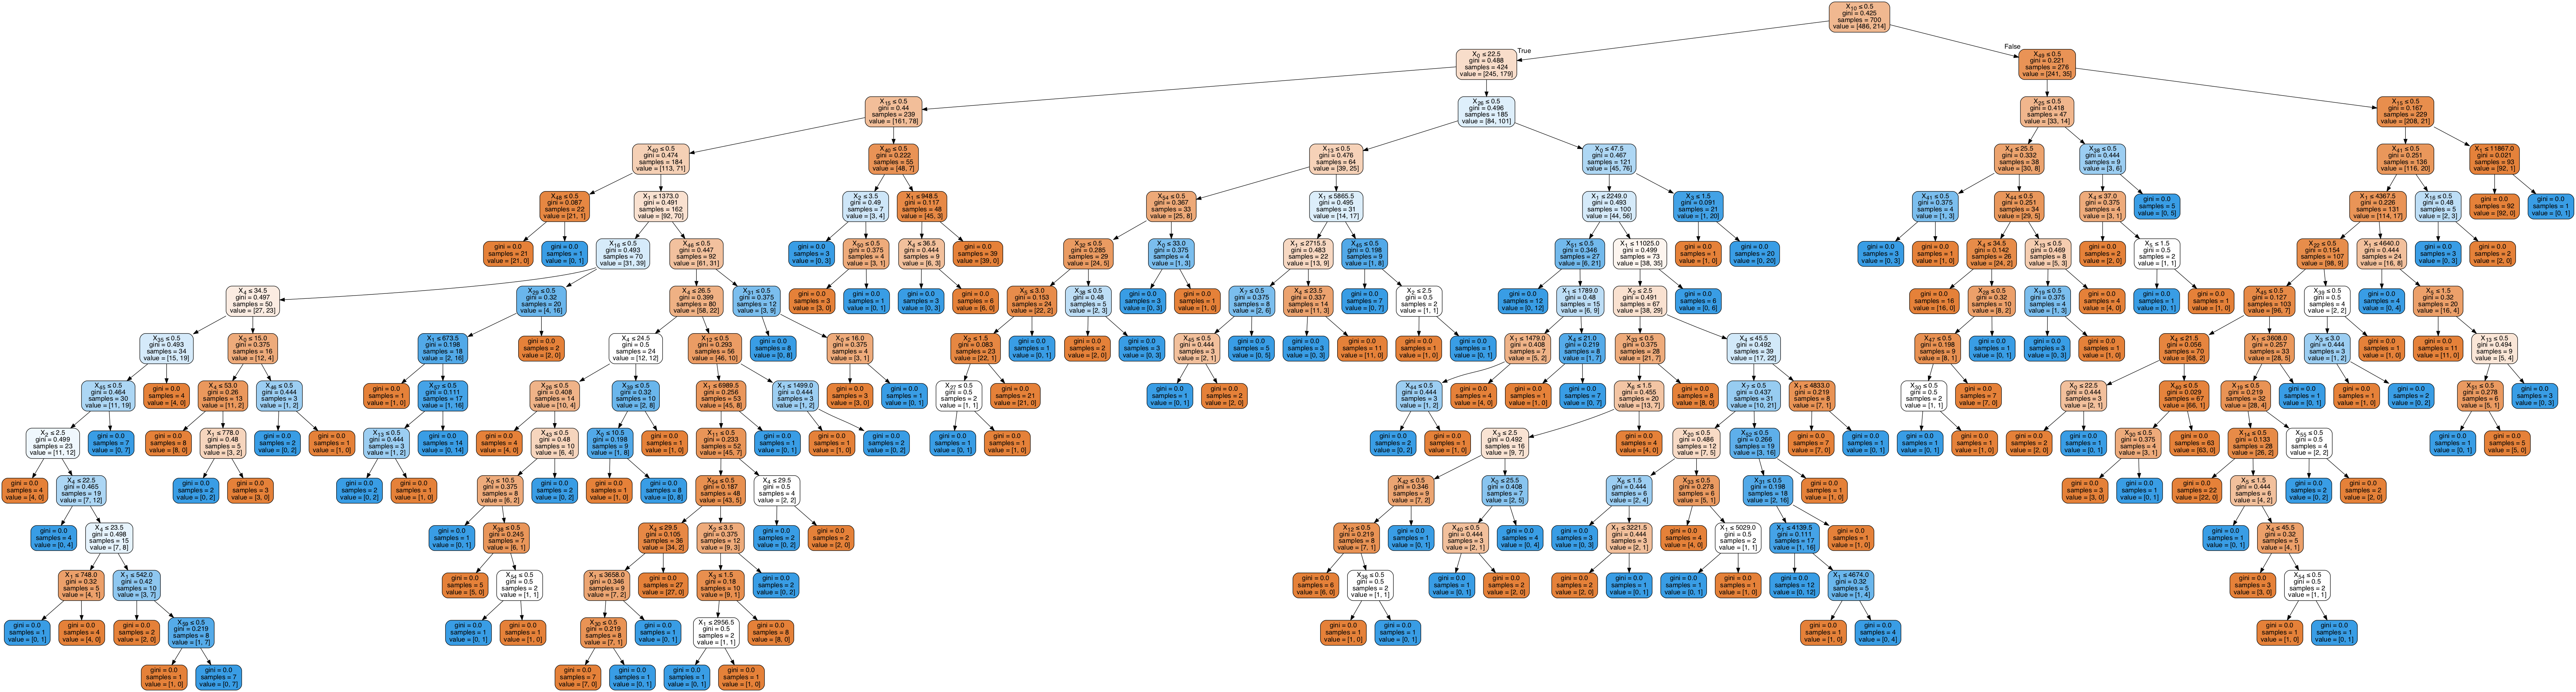

In [76]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bank.png')
Image(graph.create_png())

In [77]:
#Optimizing Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.72


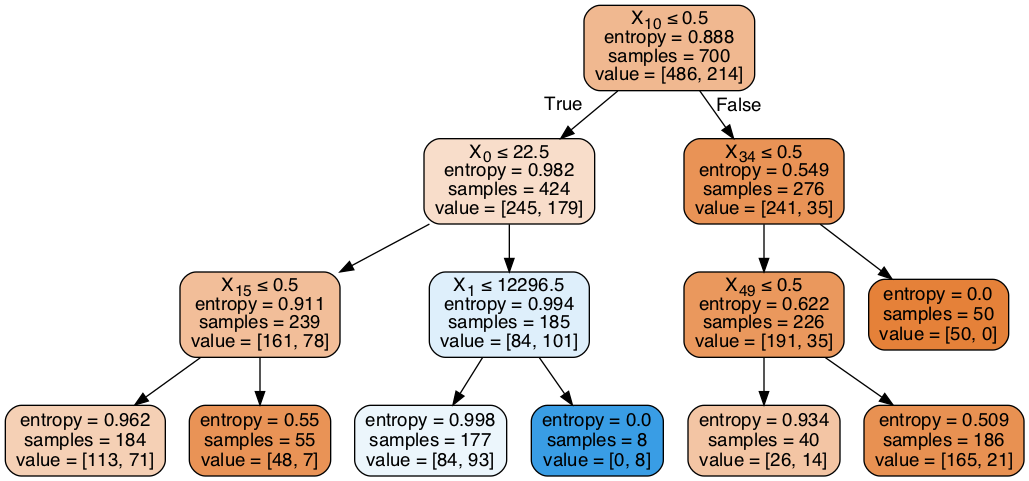

In [78]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank.png')
Image(graph.create_png())

The pruned model is simplier, easier to understand. The pros of a decision tress are they are easy to interpret and visualize, easy to capture Non-linear patterns, require fewer data preprcessing for user(no normalized data), and they decision tree has no assumptions about distribution bc of the non-parametric nature of the algorithm. While the pros are nice there are a few cons to consider. Sensitive to noisy data (may overfit noisy data), small variation/variance in data can result in a different tree, are diased with imblance dataset (recommended that balance out the dataset before creating tree).

# Random Forest method



In [79]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [80]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7366666666666667


Finding importand features first we need to create a random forest model then, use feature importance variable to see the feature importance scores, visualize these scores using seaborn.

In [81]:
feature_list = list(bank.columns[:-1]) 
#X = bank.loc[:, bank.columns != 'Good_Bad']
feature_imp = pd.Series(clf.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp.head()

credit_amount    0.104915
duration         0.080646
age              0.074506
status_A14       0.039553
status_A11       0.038871
dtype: float64

Text(0.5, 1.0, 'Visualizing Important Features')

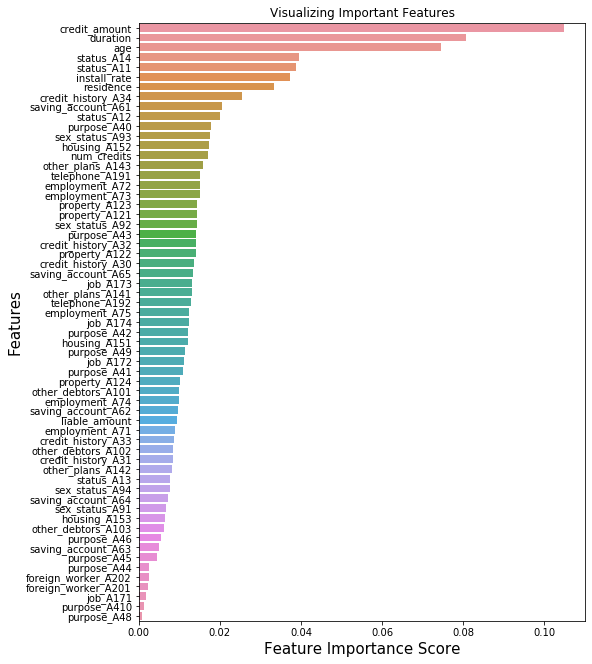

<Figure size 360x432 with 0 Axes>

In [98]:
fig, ax = plt.subplots(figsize=(8,11))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.figure(figsize=(5, 6))
#add labels
ax.set_xlabel('Feature Importance Score',fontsize=15)
ax.set_ylabel('Features',fontsize=15)
ax.set_title('Visualizing Important Features')


In [113]:
#top ten features goind in to one random forest model.
X=bank[['credit_amount','duration','age','status_A14','status_A11','install_rate',
        'residence','credit_history_A34','saving_account_A61','status_A12']]
y = bank.Good_Bad
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.70, random_state=5)

In [115]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7257142857142858
